# Sarsaによる価値反復法の実装
- 価値反復法には報酬の概念が必要。
- 時刻tでもらえる報酬を$R_t$とし、**即時報酬**と呼ぶ。
- また、今後未来でもらえる報酬の合計を報酬和と呼ぶ
$$
G_t = R_{t+1} + R_{t+2} + ...
$$
となる。
- また、時間が経つにつれ報酬の価値は低下する必要がある(報酬の価値が時間の経過につれ低下していく)
- よって、時間により報酬の低下を加味した報酬和を設定する必要がある。
$$
G_t = R_{t+1} + γR_{t+2} + γ^{2}R_{t+3} + ...
$$

### 迷路問題にも価値という概念を実装する

現在エージェントがS7にいると仮定し（状態:s = 7）, 行動:a = 右 であればS7→S8と移動することによりゴールすることができる。
##### 行動価値関数
行動価値関数$Q^π (s, a)$と表される。
右へ移動するのはインデックスがa = 1の時なので、
$$
Q^π (s = 7, a = 1) = R_{t+1} = 1
$$
となる

逆に、a=0,つまりエージェントが上にいく行動をとるときの価値を考えると、そこから最短でゴールするまでS7-S4-S7-S8と2step余計に時間がかかる。
つまり、
$$
Q^π (s = 7, a = 0) = γ^2 * 1
$$
となる。つまり、時間分だけ割引いた価値がその行動(S7から上に移動する)にはあると考えれる。


### 状態価値関数
**ベルマン方程式をあとでホワイトボードに書きながら分解する!!!**
→した
![ベルマン方程式](bellman_equation.jpg "マルコフ決定過程のおまけ付き")

In [16]:
ls

Sarsa.ipynb               meiro.ipynb               readme.md
bellman_equation.jpg      meiro_with_softmax.ipynb  requirement.txt


# 価値反復法をSarsaで実装する！
今回はQではなくまずはSarsaで。サルサ！

/Users/2357gi/Sandbox/signatej/venv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


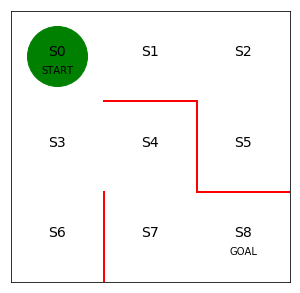

In [1]:
# まずはマップとtheta_0の定義。
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 初期状態での迷路の様子_

# 図を描く大きさと、図の変数を宣言。
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# make wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# make points
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定とメモリを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地に丸を描画する。
line, = ax.plot([0.5], [2.5], 'o', color = 'g', markersize=60)

# 初期の方策を決定するparams theta_0を設定

# 行は0~7, 列は移動方向で上右下左を表す。
theta_0 = np.array([[np.nan, 1, 1, np.nan],  
                   [np.nan, 1, np.nan, 1],
                    [np.nan, np.nan, 1, 1],
                   [1, 1, 1, np.nan],        
                   [np.nan, np.nan, 1, 1],   
                   [1, np.nan, np.nan, np.nan],  
                   [1, np.nan, np.nan, np.nan],  
                   [1, 1, np.nan, np.nan],       
                    ])

In [2]:
# 初期の行動価値関数Qを設定。
# 最初はランダムでパラメータを定義、theta_0をかけてnanを反映する。

[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [3]:
# 方策パラメータthetaを割合の方策piに変換する関数の定義
# 割合にすることで、行動がランダムになる


def simple_convert_into_pi_from_theta(theta):
    """単純に割合を計算する"""
    
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算
    
    pi = np.where( np.isnan(pi),0,pi)
    
    return pi

In [4]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [5]:
print(Q)
print('-'*20)
print('hogehoge' + str(Q[1,:]))
print('hogehogehoge' + str(np.nanargmax(Q[1, :])))
print('-'*20)
print(pi_0)

[[       nan 0.04458249 0.1969031         nan]
 [       nan 0.12721807        nan 0.25182032]
 [       nan        nan 0.24675234 0.28179087]
 [0.95338412 0.33280038 0.1701429         nan]
 [       nan        nan 0.18416732 0.80340313]
 [0.73037078        nan        nan        nan]
 [0.95218799        nan        nan        nan]
 [0.46011592 0.00095397        nan        nan]]
--------------------
hogehoge[       nan 0.12721807        nan 0.25182032]
hogehogehoge3
--------------------
[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


## ε- greedy法
- 一定確率(ε)でランダムに動き、(1-ε)でQの最大値の行動をとる。
- これにより、例えば初期段階でのランダムによるゴールで0-1-0-3-4-7-8と行動をとったとすると、
一度とった1の行動も有効なものだと捉えられ、1を踏まえた行動をしてしまうことがある。
- それを防ぐため、定期的にランダムな行動を行い、最適な行動を探索する。

In [6]:
# ε- greedy法を実装
def get_action(s, Q, eqsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    
    # 行動を決める
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == 'up':
        action = 0
    elif next_direction == 'right':
        action = 1
    elif next_direction == 'down':
        action = 2
    elif next_direction == 'left':
        action = 3
        
    return action

In [7]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]  # 行動aの方向
    
    
    # 行動から次の状態を決める
    if next_direction == 'up':
        s_next = s - 3
    if next_direction == 'right':
        s_next = s + 1
    if next_direction == 'down':
        s_next = s + 3
    if next_direction == 'left':
        s_next = s - 1
        
    return s_next

### 行動価値関数Q(s, a)をSarsaで更新
- Qが正しい値になるように更新学習する部分。
- Qが正しい値としてもとまっていればベルマン方程式により
$$
Q(s_t, a_t) = R_{t+1} + γQ(s_{t+1}, a_{t+1})
$$
という関係式が整理するが、学習の途中ではQは正しい値としても止まっていないため、この式は成立しない。

この時の両辺の差を**TD誤差**と呼ぶ。
- この誤差が0になれば、きちんと行動価値関数Qが学習できたことになる！
#### Qの更新式を定義する
$$
Q(s_t, a_t) = Q(s_t, a_t) + η*(R_{t+1} + γQ(s_{t+1}, a_{t+1}) - Q(s_t, a_t))
$$
**この更新式に従うアルゴリズムをSarsaと呼ぶ！**

In [9]:
# Sarsaによる行動価値関数Qの更新


def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    
    if s_next == 8:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
        
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    
    return Q
        

## Sarsaで迷路を解くコードを実装する
前回の方法勾配法とは異なり、価値反復法では1試行(スタートしてからゴールするまで)ではなく、１stepごとに更新を行う

In [14]:
# Sarsaで迷路を解く関数の定義、状態と行動の履歴及び更新したQを出力


def goal_maze_rets_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # スタート地点
    a = a_next = get_action(s, Q, epsilon, pi)  # 状態の行動
    s_a_history = [[0, np.nan]]  # エージェントの行動履歴
    
    while(1):  # ゴールするまでループ
        a = a_next  # 行動更新
        
        s_a_history[-1][1] = a
        # 現在の状態(一番最後なのでindexは-1を見てる)に行動を代入
        
        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の行動を格納。s_t
        
        s_a_history.append([s_next, np.nan])
        # 次の状態を格納。
        
        if s_next == 8:
            r = 1  # ゴールにたどり着いたら報酬を与える。
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動関数a_nextを求める。
        
        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
    return [s_a_history, Q]
        
    

## 実際に実行する。

In [15]:

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # e-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める(ベルマン方程式)
is_continue = True
episode = 1

while is_continue:
    print("episode: " + str(episode))
    
    # e-greedy法の値を徐々に小さくする
    epsilon = epsilon / 2
    
    # Sarsaで迷路をとき、移動した履歴と更新したQを求める
    [s_a_history, Q] = goal_maze_rets_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
    print(np.sum(np.abs(new_v - v)))  # 状態価値の変化を出力
    v = new_v
    
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    
    # １００ep繰り返す
    episode = episode + 1
    if episode > 100:
        break

episode: 1
1.2952378829977125
迷路を解くのにかかったステップ数は102です
episode: 2
1.2450181709010382
迷路を解くのにかかったステップ数は356です
episode: 3
0.017985041434554205
迷路を解くのにかかったステップ数は6です
episode: 4
0.0473000577534336
迷路を解くのにかかったステップ数は22です
episode: 5
0.08351910523867512
迷路を解くのにかかったステップ数は12です
episode: 6
0.07902084848885543
迷路を解くのにかかったステップ数は8です
episode: 7
0.0726566807193377
迷路を解くのにかかったステップ数は6です
episode: 8
0.06883450839821614
迷路を解くのにかかったステップ数は4です
episode: 9
0.0677755528644422
迷路を解くのにかかったステップ数は4です
episode: 10
0.06648078075790015
迷路を解くのにかかったステップ数は4です
episode: 11
0.06494903662675153
迷路を解くのにかかったステップ数は4です
episode: 12
0.06319112856555473
迷路を解くのにかかったステップ数は4です
episode: 13
0.0623993379492363
迷路を解くのにかかったステップ数は4です
episode: 14
0.061722551619883076
迷路を解くのにかかったステップ数は4です
episode: 15
0.0609863503664555
迷路を解くのにかかったステップ数は4です
episode: 16
0.06018703239000947
迷路を解くのにかかったステップ数は4です
episode: 17
0.05932240871814534
迷路を解くのにかかったステップ数は4です
episode: 18
0.05839172552065658
迷路を解くのにかかったステップ数は4です
episode: 19
0.05739554747801301
迷路を解くのにかかったステップ数は4です
e